## Capstone Project: 

**Problem Statement:**
* It is a critical requirement for business to understand the value derived from a customer.
* Customer segmentation or classification is the practice of segregating the customer base into groups of individuals based on some common characteristics such as age, gender, interests, and spending habits

**Dataset Description:** 
    This is a transnational data set which contains all the transactions that occurred between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique and all-occasion gifts.

* **InvoiceNo:** Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation. 
* **StockCode:** Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product. 
* **Description:** Product (item) name. Nominal. 
* **Quantity:** The quantities of each product (item) per transaction. Numeric. 
* **InvoiceDate:** Invoice Date and time. Numeric, the day and time when each transaction was generated. 
* **UnitPrice:** Unit price. Numeric, Product price per unit in sterling. 
* **CustomerID:** Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer. 
* **Country:** Country name. Nominal, the name of the country where each customer resides.


### Project Task: Week 1:
**Data Cleaning:**

2. Data finding and analysing the problem statement for the data.

    a. We searched the internet for various sources.

    b. We found the data of a retail company online though a website machinelearning.com .

2. Perform a preliminary data inspection and data cleaning.

    a. Check for missing data and formulate a strategy to deal with the missing data.

    b. Remove duplicate data records.

    c. Perform descriptive analytics on the given data.

### Project Task: Week 2:

**Data Transformation:**

3. Perform cohort analysis (Cohort Analysis is a form of behavioral analytics that takes data from a given subset, such as a SaaS business, game, or e-commerce platform, and groups it into related groups rather than looking at the data as one unit.). Observe how a cohort behaves across time and compare it to other cohorts.

    a. Create month cohorts and analyze active customers for each cohort.

    b. Analyze the retention rate of customers.


# SOLUTION:
## Week 1:
### (A) Data Cleaning
**(1) Reading Data and Preliminary Data Inspection**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from datetime import timedelta
from pandas import ExcelWriter

In [2]:
df = pd.read_excel("Online Retail.xlsx")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
df.shape
#the number of rows and columns of the DataFrame.

(541909, 8)

In [4]:
# Check feature details of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
# Check missing values in data first
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
# Calculating the Missing Values percentage in DF
# In a literature, when more than 10% of data are missing, estimates are likely to be biased
df_null = round(df.isnull().sum()/len(df)*100,2)
df_null

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

If there are way too many missing values in a column then you can drop that column.
Otherwise we can fill missing values with mean, median and mode.

As we can see two columns in data have missing values.
* Description - 0.27% (1454 nos.)
* CustomerID  - 24.93% (135080)

**CustomerID** is important feature of our analysis since our analysis is centered around Customers only so we can not impute null values **CustomerID** with mean/ median/ mode in this case. We will check possibility to fill null values in **CustomerID** column by looking up for **InvoiceNo** of the row having null **CustomerID** in other rows where **CustomerID** is present. If there are still any null values in **CustomerID** after this process then we will drop complete row having missing **CustomerID**.

We can drop **Description** feature from our data since it is not not going to contribute in our model.

In [7]:
invoice_null_custid = set(df[df['CustomerID'].isnull()]['InvoiceNo'])
df[df['InvoiceNo'].isin(invoice_null_custid) & (~df['CustomerID'].isnull())]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


We are not not find any value to impute null values in **CustomerID** column since all entries for a particular **InvoiceNo** have missing **CustomerID** if that particular **InvoiceNo** has null **CustomerID** in even one entry. So we will drop all rows having null values in **CustomerID**.

In [8]:
df = df.drop('Description', axis=1)
df = df.dropna()
df.shape

(406829, 7)

Comparing the shape of data:
Shape before the data cleaning: (541909, 8)
Shape after the data cleaning: (406829, 7)
One coloumn has been removed and around 140000 rows have been removed

* **(c) Perform descriptive anaylysis on the given data:**

In [9]:
# CustomerID is 'float64', changing the datatype of CustomerId to string as Customer ID as numerical data does not make sense

df['CustomerID'] = df['CustomerID'].astype(str)

In [10]:
df.describe(datetime_is_numeric=True)

,Quantity,InvoiceDate,UnitPrice
count,406829.000000,406829,406829.000000
mean,12.061303,2011-07-10 16:30:57.879207424,3.460471
min,-80995.000000,2010-12-01 08:26:00,0.000000
25%,2.000000,2011-04-06 15:02:00,1.250000
50%,5.000000,2011-07-31 11:48:00,1.950000
75%,12.000000,2011-10-20 13:06:00,3.750000
max,80995.000000,2011-12-09 12:50:00,38970.000000
std,248.693370,NaN,69.315162


* **Quantity:** Average quantity of each product in transaction is 12.18. Also note that minimum value in **Quantity** column is negative. This implies that some customers had returned the product during our period of analysis.
* **InvoiceDate:** Our data has transaction between 01-12-2010 to 09-12-2011
* **UnitPrice:** Average price of each product in transactions is 3.47

In [11]:
df.describe(include=['O'])

,InvoiceNo,StockCode,CustomerID,Country
count,406829,406829,406829,406829
unique,22190,3684,4372,37
top,576339,85123A,17841.0,United Kingdom
freq,542,2077,7983,361878


* **InvoiceNo:** Total entries in preprocessed data are 4,01,602 but transactions are 22,190. Most number of entries (count of unique products) are in Invoice No. '576339' and is 542 nos.
* **StockCode:** There are total 3684 unique products in our data and product with stock code '85123A' appears most frequently (2065 times) in our data.
* **CustomerID:** There are 4372 unique customers in our final preprocessed data. Customer with ID '17841' appears most frequently in data (7812 times)
* **Country:** Company has customers across 37 countries. Most entries are from United Kingdom in our dataset (356726)

### (B) Data Transformation
**(2) Perform Cohort Analysis**
* **(a) Create month cohort of customers and analyze active customers in each cohort:**

In [12]:
# Convert to InvoiceDate to Year-Month format
df['month_year'] = df['InvoiceDate'].dt.to_period('M')
df['month_year'].nunique()

13

In [13]:
month_cohort = df.groupby('month_year')['CustomerID'].nunique()
month_cohort

month_year
2010-12     948
2011-01     783
2011-02     798
2011-03    1020
2011-04     899
2011-05    1079
2011-06    1051
2011-07     993
2011-08     980
2011-09    1302
2011-10    1425
2011-11    1711
2011-12     686
Freq: M, Name: CustomerID, dtype: int64

Text(0.5, 1.0, 'No. of active customers in each month')

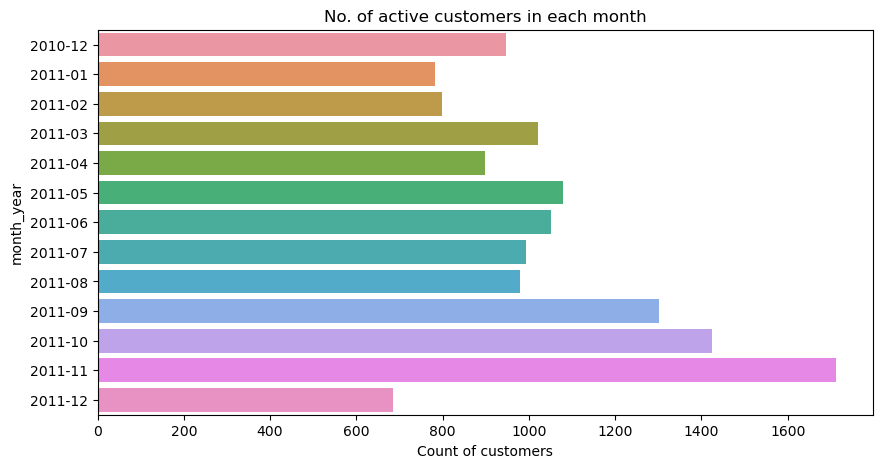

In [14]:
plt.figure(figsize=(10,5))
sns.barplot(y = month_cohort.index, x = month_cohort.values);
plt.xlabel("Count of customers")
plt.title("No. of active customers in each month")

In [15]:
month_cohort - month_cohort.shift(1)

month_year
2010-12       NaN
2011-01    -165.0
2011-02      15.0
2011-03     222.0
2011-04    -121.0
2011-05     180.0
2011-06     -28.0
2011-07     -58.0
2011-08     -13.0
2011-09     322.0
2011-10     123.0
2011-11     286.0
2011-12   -1025.0
Freq: M, Name: CustomerID, dtype: float64

In [16]:
retention_rate = round(month_cohort.pct_change(periods=1)*100,2)
retention_rate

month_year
2010-12      NaN
2011-01   -17.41
2011-02     1.92
2011-03    27.82
2011-04   -11.86
2011-05    20.02
2011-06    -2.59
2011-07    -5.52
2011-08    -1.31
2011-09    32.86
2011-10     9.45
2011-11    20.07
2011-12   -59.91
Freq: M, Name: CustomerID, dtype: float64

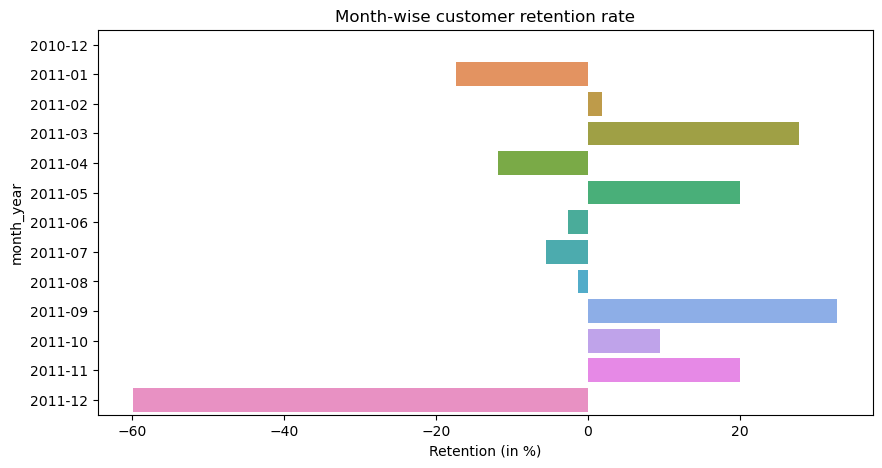

In [17]:
plt.figure(figsize=(10,5))
sns.barplot(y = retention_rate.index, x = retention_rate.values);
plt.xlabel("Retention (in %)")
plt.title("Month-wise customer retention rate");

In [18]:
df['amount'] = df['Quantity']*df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,month_year,amount
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12,15.30
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12,22.00
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34


In [19]:
df_monetary = df.groupby('CustomerID').sum()['amount'].reset_index()
df_monetary

,CustomerID,amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4367,18280.0,180.60
4368,18281.0,80.82
4369,18282.0,176.60
4370,18283.0,2094.88


In [20]:
df_frequency = df.groupby('CustomerID').nunique()['InvoiceNo'].reset_index()
# df_freqency = df.drop_duplicates('InvoiceNo').groupby('CustomerID').count()['InvoiceNo'].reset_index()
df_frequency

,CustomerID,InvoiceNo
0,12346.0,2
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1
...,...,...
4367,18280.0,1
4368,18281.0,1
4369,18282.0,3
4370,18283.0,16


# Recency Analysis

In [21]:
# Fix reference date for calculating recency as last transaction day in data + 1 day
ref_day = max(df['InvoiceDate']) + timedelta(days=1)
df['days_to_last_order'] = (ref_day - df['InvoiceDate']).dt.days
df.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,month_year,amount,days_to_last_order
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12,15.30,374
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34,374
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12,22.00,374
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34,374
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34,374


In [22]:
df_recency = df.groupby('CustomerID')['days_to_last_order'].min().reset_index()
df_recency

,CustomerID,days_to_last_order
0,12346.0,326
1,12347.0,2
2,12348.0,75
3,12349.0,19
4,12350.0,310
...,...,...
4367,18280.0,278
4368,18281.0,181
4369,18282.0,8
4370,18283.0,4


In [23]:
df_rf = pd.merge(df_recency, df_frequency,  on='CustomerID', how='inner')
df_rfm = pd.merge(df_rf, df_monetary, on='CustomerID', how='inner')
df_rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']
df_rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,2,0.00
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,310,1,334.40


# RFM Metrics

RFM metrics is a method used in marketing analysis to evaluate the value of a customer to a business. RFM stands for Recency, Frequency, and Monetary Value, and each metric is used to segment customers based on their purchasing behavior.

By analyzing these three metrics, businesses can segment their customers into groups based on their value, and then tailor their marketing strategies to each group such as loyalty rewards and special deals.

In [24]:
df_rf = pd.merge(df_recency, df_frequency,  on='CustomerID', how='inner')
df_rfm = pd.merge(df_rf, df_monetary, on='CustomerID', how='inner')
df_rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']
df_rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,2,0.00
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,310,1,334.40


newest    2734
newer      588
medium     416
older      353
oldest     281
Name: recency_labels, dtype: int64

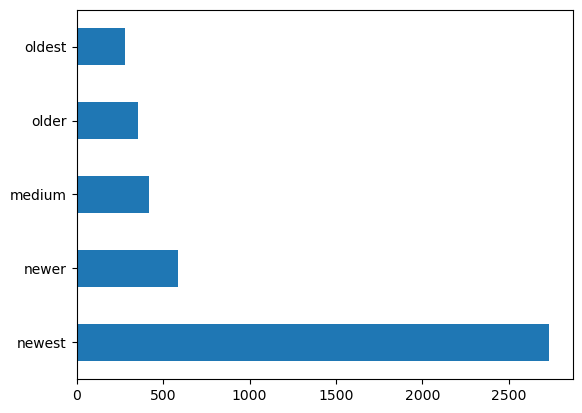

In [25]:
df_rfm['recency_labels'] = pd.cut(df_rfm['Recency'], bins=5,
                                     labels=['newest', 'newer', 'medium', 'older', 'oldest'])
df_rfm['recency_labels'].value_counts().plot(kind='barh');
df_rfm['recency_labels'].value_counts()

lowest     4348
lower        18
medium        3
highest       2
higher        1
Name: frequency_labels, dtype: int64

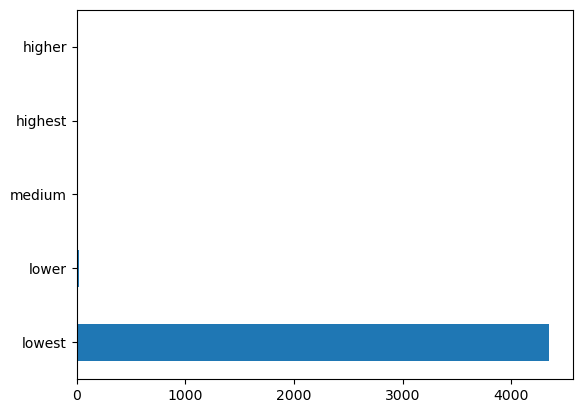

In [26]:
df_rfm['frequency_labels'] = pd.cut(df_rfm['Frequency'], bins=5, labels=['lowest', 'lower', 'medium', 'higher', 'highest'])
df_rfm['frequency_labels'].value_counts().plot(kind='barh');
df_rfm['frequency_labels'].value_counts()

smallest    4358
smaller        8
medium         3
largest        2
larger         1
Name: monetary_labels, dtype: int64

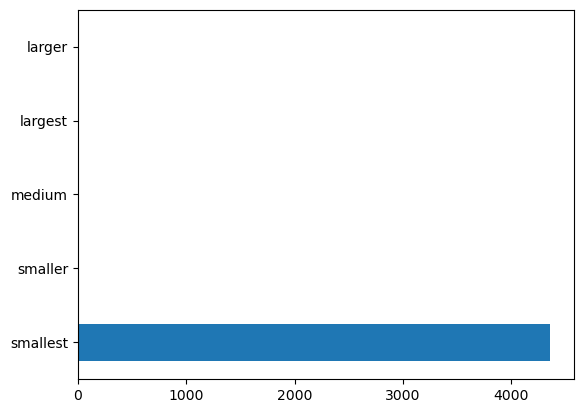

In [27]:
df_rfm['monetary_labels'] = pd.cut(df_rfm['Monetary'], bins=5, labels=['smallest', 'smaller', 'medium', 'larger', 'largest'])
df_rfm['monetary_labels'].value_counts().plot(kind='barh');
df_rfm['monetary_labels'].value_counts()

In [28]:
df_rfm['rfm_segment'] = df_rfm[['recency_labels','frequency_labels','monetary_labels']].agg('-'.join, axis=1)
df_rfm.head()

,CustomerID,Recency,Frequency,Monetary,recency_labels,frequency_labels,monetary_labels,rfm_segment
0,12346.0,326,2,0.00,oldest,lowest,smallest,oldest-lowest-smallest
1,12347.0,2,7,4310.00,newest,lowest,smallest,newest-lowest-smallest
2,12348.0,75,4,1797.24,newest,lowest,smallest,newest-lowest-smallest
3,12349.0,19,1,1757.55,newest,lowest,smallest,newest-lowest-smallest
4,12350.0,310,1,334.40,oldest,lowest,smallest,oldest-lowest-smallest


# RFM Score

In [29]:
recency_dict = {'newest': 5, 'newer':4, 'medium': 3, 'older':2, 'oldest':1}
frequency_dict = {'lowest':1, 'lower':2, 'medium': 3, 'higher':4, 'highest':5}
monetary_dict = {'smallest':1, 'smaller':2, 'medium': 3, 'larger':4, 'largest':5}

df_rfm['rfm_score'] = df_rfm['recency_labels'].map(recency_dict).astype(int)+ df_rfm['frequency_labels'].map(frequency_dict).astype(int) + df_rfm['monetary_labels'].map(monetary_dict).astype(int)
df_rfm.head(10)

,CustomerID,Recency,Frequency,Monetary,recency_labels,frequency_labels,monetary_labels,rfm_segment,rfm_score
0,12346.0,326,2,0.00,oldest,lowest,smallest,oldest-lowest-smallest,3
1,12347.0,2,7,4310.00,newest,lowest,smallest,newest-lowest-smallest,7
2,12348.0,75,4,1797.24,newest,lowest,smallest,newest-lowest-smallest,7
3,12349.0,19,1,1757.55,newest,lowest,smallest,newest-lowest-smallest,7
4,12350.0,310,1,334.40,oldest,lowest,smallest,oldest-lowest-smallest,3
5,12352.0,36,11,1545.41,newest,lowest,smallest,newest-lowest-smallest,7
6,12353.0,204,1,89.00,medium,lowest,smallest,medium-lowest-smallest,5
7,12354.0,232,1,1079.40,older,lowest,smallest,older-lowest-smallest,4
8,12355.0,214,1,459.40,medium,lowest,smallest,medium-lowest-smallest,5
9,12356.0,23,3,2811.43,newest,lowest,smallest,newest-lowest-smallest,7


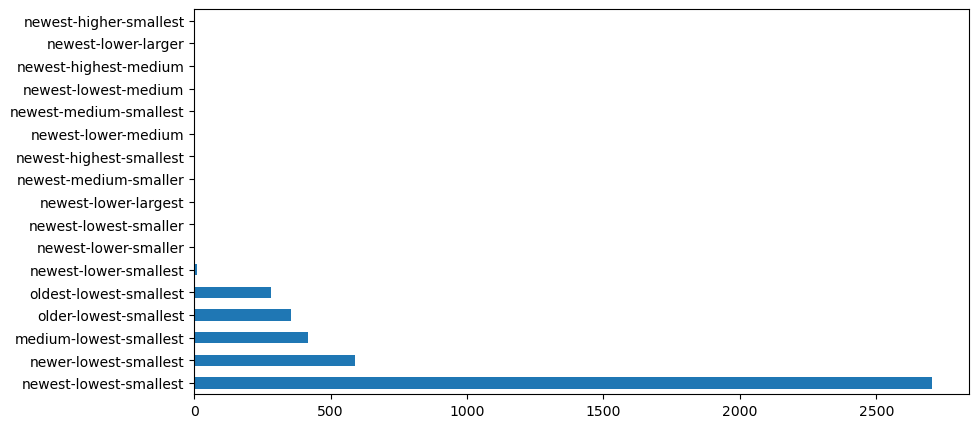

In [30]:
df_rfm['rfm_segment'].value_counts().plot(kind='barh', figsize=(10, 5));

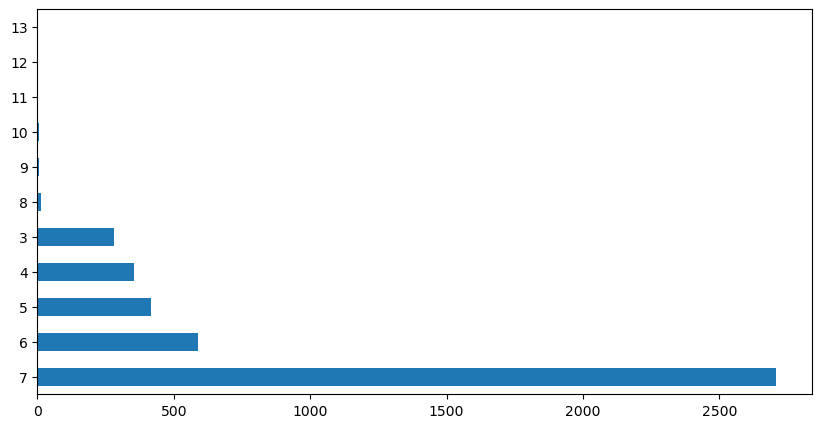

In [31]:
df_rfm['rfm_score'].value_counts().plot(kind='barh', figsize=(10, 5));

Now we plan to apply machine learning algorithms such as K-Means clustering to classify the data in different groups to make personalised strategies for the specific groups.

Also it is necessary to remove the outliers and scale the data by using the appropriate techniques bofore applying the clustering algorithms.